In drug design and discovery, computational docking plays a major role in screening the designed compounds. This module takes the user step-by-step through preparing the protein and ligand for docking calculations and analysis. Users can extract the ligands from the protein data bank. Ligands can also be prepared by sketching, generating a 3D structure of the ligand in PDB format.  Examples of PDB drug-protein complexes will be used to demonstrate docking using docking software. Analysis and preparation of files for presentation and detailed description are provided. In addition, users can visualize protein-protein interactions and analyze the details of interaction sites.

## **Learning Objectives:**
To prepare the protein of interest for docking calculations. To retrieve the protein and ligand structures from the protein data bank and prepare the structures for docking calculations.
Perform protein-ligand docking calculations, analyze the docking results, and choose the most possible docking ligands in the order of binding affinity (docking energy) for drug design.

To sketch a small molecule ligand and prepare the 3D structure of ligand drugs to dock to proteins.

To perform protein-protein docking and analyze the interaction surface of two proteins.

**Prerequisites:** Familiar with Pymol. Add any other prerequisites here

## **Docking**
**Background:** Docking is a computational method to simulate ligand-receptor interactions using the three-dimensional structures of receptors and ligands.

**Why are docking calculations done?**
In drug discovery, several hundreds or thousands of compounds will be screened by experimental methods to search for a “hit” compound. Docking provides an alternative to the experimental high-throughput screening method.
The overall schematic diagram of early-stage drug design and development is shown here. Once a hit compound is identified that compound is developed into a lead compound, and preclinical studies are performed on that compound.


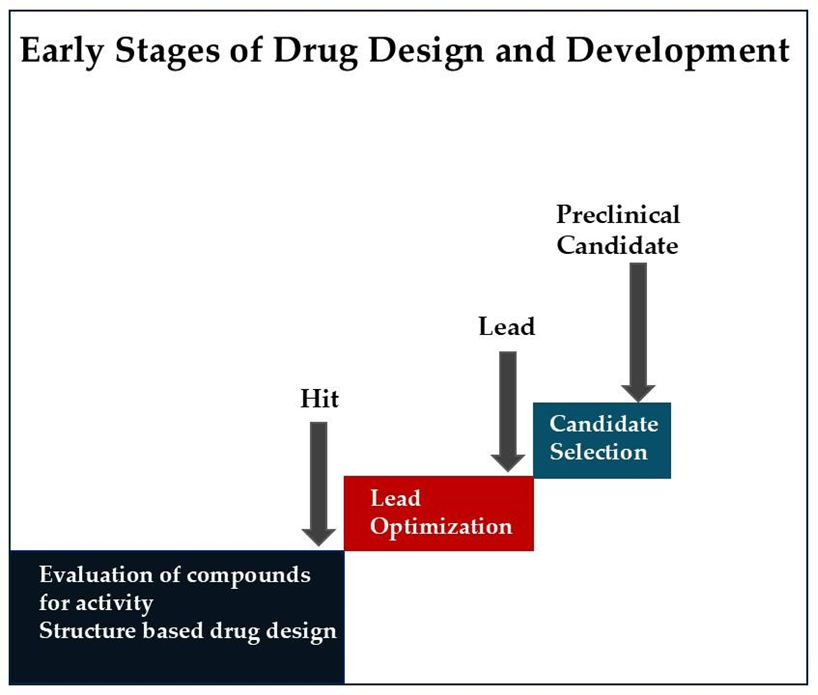

In docking, different ligands are designed to dock to the target protein at a particular known binding site, and the energy of interactions between ligand and receptor is calculated. The ligand interaction is scored based on free energy function and ligands are arranged from lowest energy to highest energy. The lowest energy structure of the ligand interacting with the receptor at the drug target site is considered a possible hit compound. From the low energy docked structures obtained, several compounds are chemically synthesized and screened with biological/pharmacological assay, and a hit compound is identified.

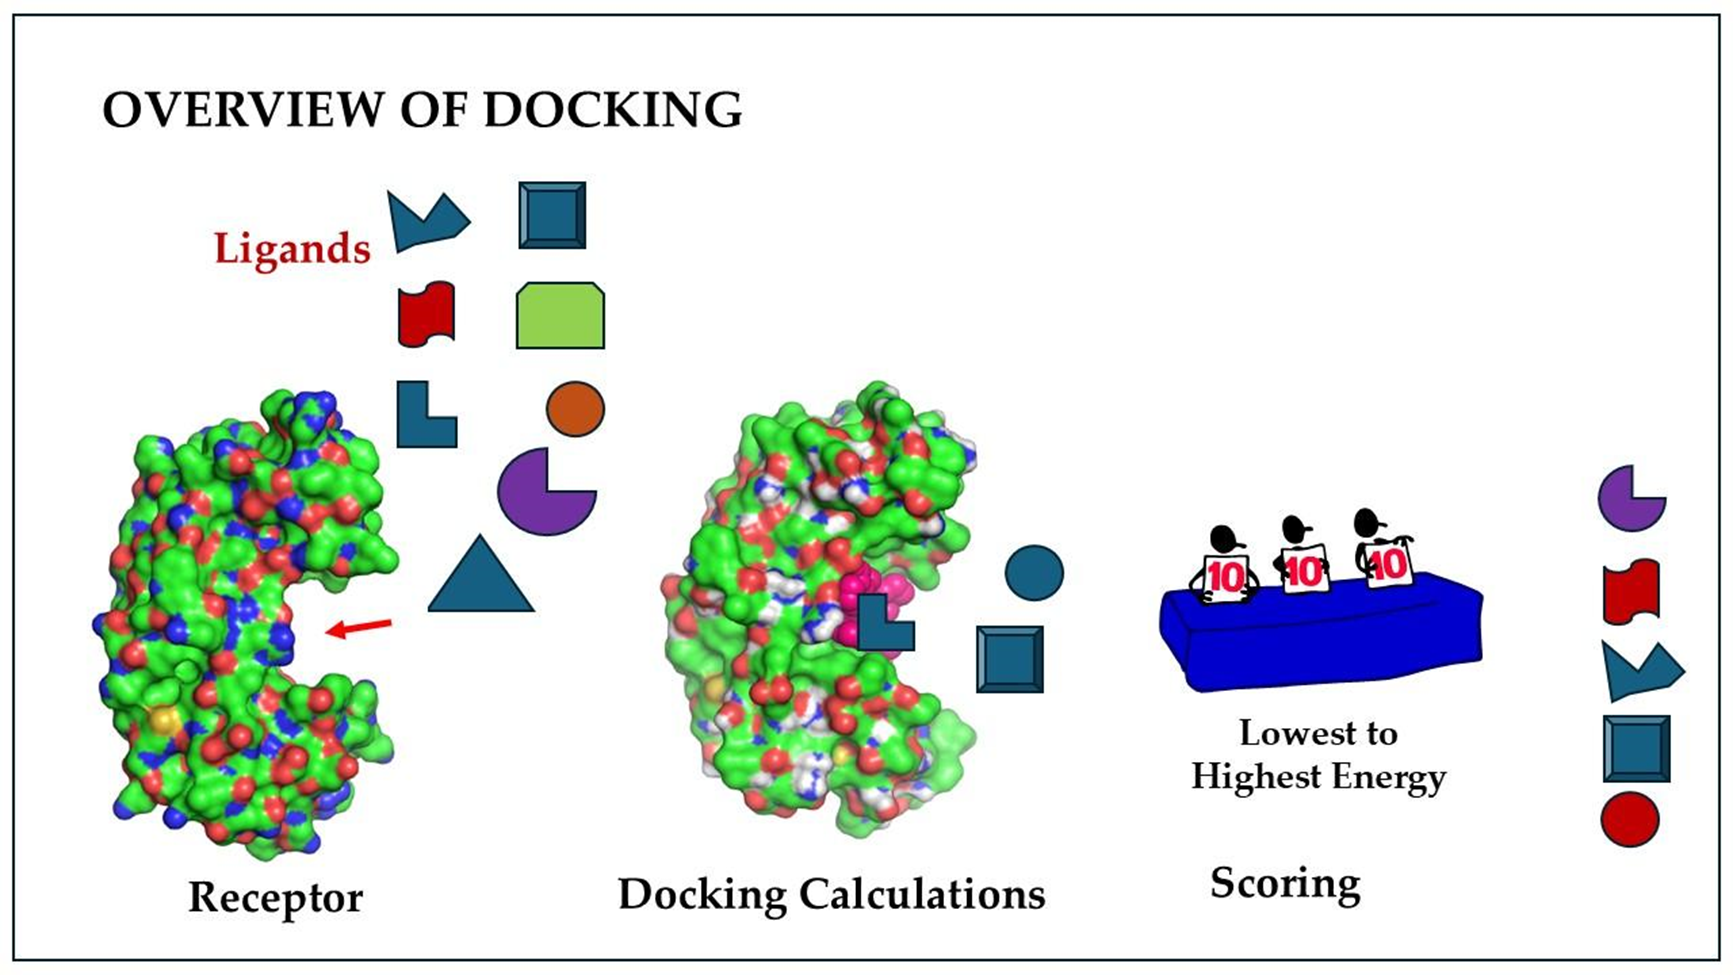

### **What is the input information needed for docking calculations?**
**3D Structure of a protein of interest**
Protein Database, Alphafold, Cryo-electron microscopy (Cryo-EM), Other protein Modeling methods.

**3D Structure of a Ligand **
Crystal Structure, NMR Structure
You can generate using sketching and 3D modeling software

A ligand or drug binds to the receptor when the non-covalent interactions (in some cases covalent) are optimized.


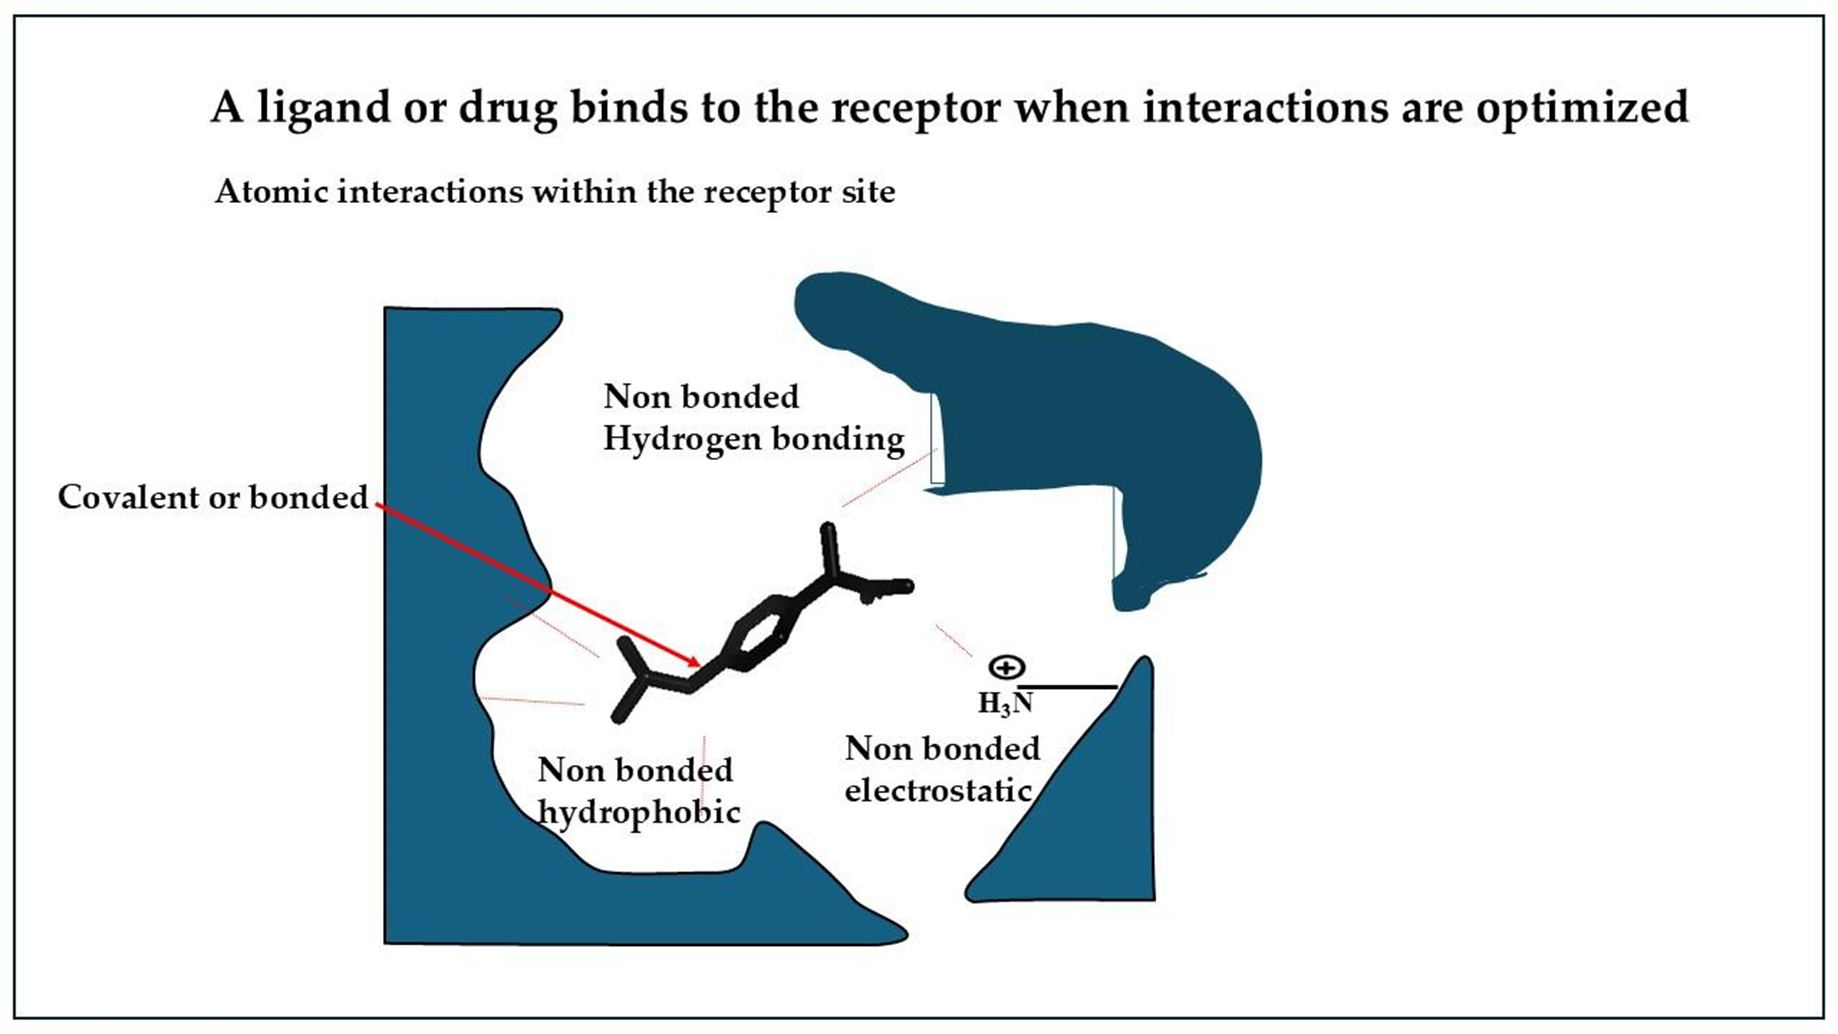

## **Ligand and Binding Site Analysis**

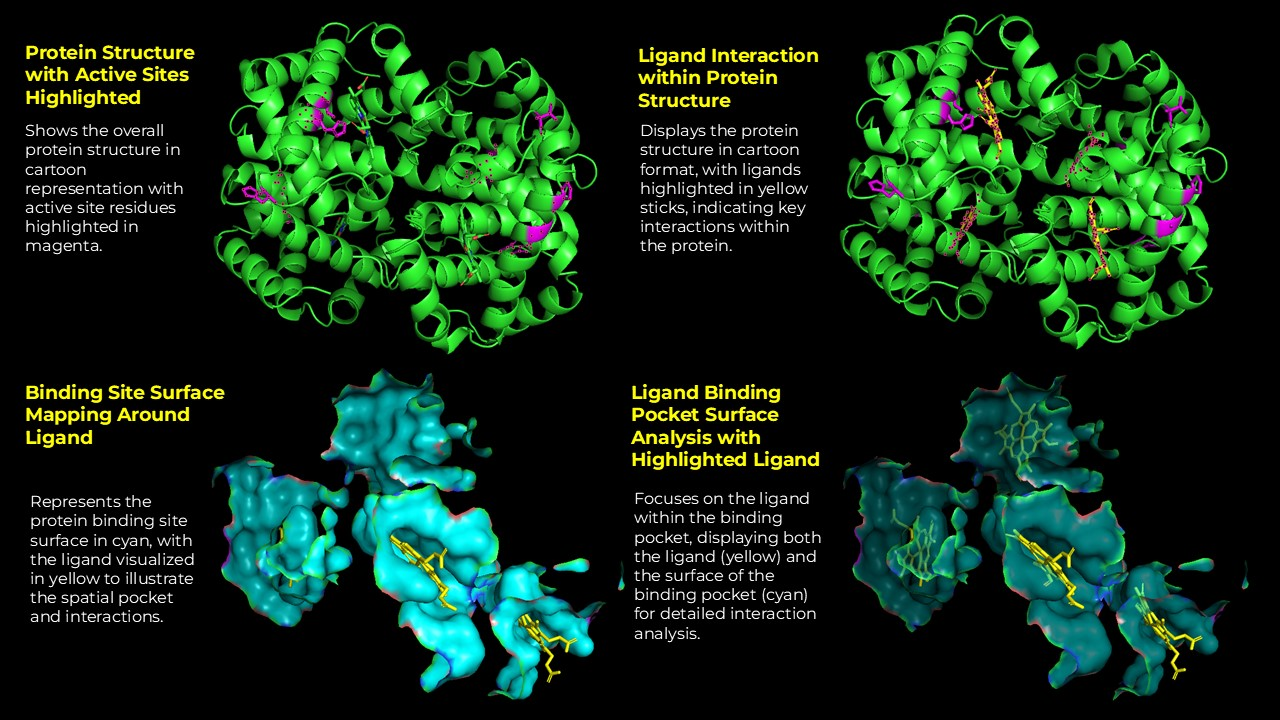

In this tutorial, we will use the PyMOL command line to:

Select and visualize specific residues (e.g., active site residues).
Identify and highlight ligands in the protein structure.
Identify and visualize the binding site around the ligand.

## **Command Line Steps**

**1. Select and Visualize Specific Residues**

Let's begin by selecting and visualizing specific residues, such as those in an active site.

```
select active_site, resi 50+58+62  # Select residues 50, 58, and 62
show sticks, active_site           # Show the active site in stick representation
color magenta, active_site         # Color the active site magenta
```

These commands will help you visualize the key residues (in this example, residues 50, 58, and 62) that may be important for the protein's function, such as its catalytic activity.

**2. Ligand Identification and Visualization:**

Next, we want to identify and highlight the ligand present in the structure.

```
select ligand, organic               # Select organic molecules (usually ligands)
color yellow, ligand                 # Color the ligand yellow
show sticks, ligand                  # Show the ligand in stick representation
```

This will help you easily identify any cofactors or ligands that may be involved in the protein's function.

**Alternative Method for Selecting Ligands by Residue Name:**

If you know the residue name of the ligand, use:

```
select ligand, resn LIG            # Replace LIG with the actual residue name of the ligand
show sticks, ligand
color yellow, ligand
```

This allows you to specify the ligand more precisely if the residue name is known.

**Reset Visualization (Optional)**

To clear the display and start fresh:

```
hide everything, all               # Hide all elements for a clean visualization
```

**3. Binding Site Identification:**

Now, let's identify the binding site by selecting residues within a certain distance of the ligand (e.g., 5 Å).

```
select binding_site, byres (ligand around 5)  # Select residues within 5 Å of the ligand
show surface, binding_site                    # Show the binding site surface representation
color cyan, binding_site                      # Color the binding site surface cyan
```

These commands highlight the residues that form the binding pocket around the ligand, giving you an idea of the interacting area.

**4. Zoom into the Binding Site and Ligand:**

To focus on the binding site and the ligand:
```
zoom (ligand or binding_site)  # Zoom into the ligand and its binding site
```

This command makes it easier to inspect the specific interactions between the ligand and the surrounding residues.

**5. Adjust Transparency for Better Visualization:**

To improve visualization, we can make the surface semi-transparent

```
set transparency, 0.5, binding_site  # Set the transparency of the binding site surface
```

This is particularly useful when you want to observe both the ligand and the binding pocket without obscuring any details.

## **PML Script for Ligand and Binding Site Analysis**

In [ ]:
with open("2.1 Ligand_Binding_Site_Analysis.pml", "w") as scriptout:
    # Step 1: Fetch and Load the Protein Structure
    scriptout.write("delete all\n")  # Clear all previous objects
    scriptout.write("fetch 1A3N, async=0\n")  # Fetch the protein structure
    scriptout.write("create protein_structure, 1A3N\n")  # Create an object for the fetched structure
    scriptout.write("hide everything, all\n")  # Hide all default representations
    scriptout.write("show cartoon, all\n")  # Show cartoon representation

    # Step 2: Select and Visualize Specific Residues
    scriptout.write("select active_site, resi 50+58+62\n")  # Select residues 50, 58, and 62
    scriptout.write("show sticks, active_site\n")  # Show active site in stick representation
    scriptout.write("color magenta, active_site\n")  # Color the active site magenta

    # Step 3: Ligand Identification and Visualization
    scriptout.write("select ligand, organic\n")  # Select organic molecules (ligands)
    scriptout.write("color yellow, ligand\n")  # Color the ligand yellow
    scriptout.write("show sticks, ligand\n")  # Show the ligand in stick representation

    # Step 4: Binding Site Identification
    scriptout.write("select binding_site, byres (ligand around 5)\n")  # Select residues within 5 Å of the ligand
    scriptout.write("show surface, binding_site\n")  # Show the binding site in surface representation
    scriptout.write("color cyan, binding_site\n")  # Color the binding site surface cyan

    # Step 5: Zoom into the Binding Site and Ligand
    scriptout.write("zoom (ligand or binding_site)\n")  # Zoom into the ligand and binding site

    # Step 6: Adjust Transparency for Better Visualization
    scriptout.write("set transparency, 0.5, binding_site\n")  # Set transparency of binding site surface

    # Step 7: Highlight Interacting Residues
    scriptout.write("select interacting_residues, byres (ligand around 4)\n")  # Select residues interacting with ligand
    scriptout.write("show sticks, interacting_residues\n")  # Show interacting residues as sticks
    scriptout.write("color green, interacting_residues\n")  # Color interacting residues green

    # Step 8: Measure Specific Distances
    scriptout.write("distance my_distance, ligand and name C1, active_site and name CA\n")  # Measure distance between ligand and active site

    # Step 9: Save the Visualization (Optional)
    scriptout.write("png ligand_binding_site_visualization.png, dpi=300\n")  # Save the visualization as a PNG file

    # Notes for Analysis
    scriptout.write("# Notes:\n")
    scriptout.write("# - Active site residues and ligand are visualized in sticks for detailed inspection.\n")
    scriptout.write("# - Binding site surface is highlighted and made semi-transparent for clarity.\n")
    scriptout.write("# - Interacting residues are shown in green for easy identification of key interactions.\n")


### 🌟 **Activity: Visualizing the Optimized Interaction of Ibuprofen with COX-2**

**Objective:**  
To use PyMOL to analyze the binding interactions of **ibuprofen** with the **cyclooxygenase-2 (COX-2)** enzyme and identify key interacting residues.

### **Steps to Perform the Activity**

#### **Step 1: Load the PDB File**
1. **Fetch the PDB Structure:**
   Open PyMOL and fetch the structure of **COX-2 bound with ibuprofen**:
     ```
     File > Get PDB
     ```
   Enter the **PDB ID**: `4PH9` and download.

2. **Initial Display:**
   The structure contains two COX-2 molecules in the asymmetric unit along with solvent and water molecules.

#### **Step 2: Simplify the Structure**
1. **Display the Protein Sequence:**
   Go to:
     ```
     Display > Sequence
     ```
   The sequence of the protein is displayed at the top of the PyMOL interface.

2. **Remove Unnecessary Molecules:**
   **Keep:**
     - One **COX-2 molecule**.
     - The **ibuprofen molecule (IBP)**.
   **Remove:**
     - The second COX-2 molecule.
     - Water, solvent, and other ligands such as **HEM, NAG, MAN, EDO, AKR, BOG**, and **red O**.

#### **Step 3: Highlight the Binding Site**
1. **Apply Ligand Site Preset:**
   On the right-side menu:
     ```
     A (Action) > Preset > Ligand Site > Cartoon
     ```
   The structure will display:
     - **Ibuprofen** in **stick representation**.
     - The protein in **secondary structure cartoon representation**.
     - **Interacting amino acid residues** as thin sticks in a zoomed view.

2. **Label Key Residues:**
   Using the **left mouse button**, click on the interacting amino acid residues (displayed as thin sticks).
   Go to the right-side menu and label residues:
     ```
     Select > L (Label) > Residues
     ```
   The selected residues will now be labeled.

### **Expected Outcome**
- The **ibuprofen molecule (IBP)** is shown in **stick representation**, surrounded by interacting residues.
- The protein is displayed in a **cartoon representation**, highlighting the **binding pocket**.
- Key interacting residues are labeled for further analysis.

### **Citation**
Orlando, B.J., Lucido, M.J., Malkowski, M.G. (2015) **J Struct Biol** 189: 62-66.  
**PDB ID:** `4PH9`

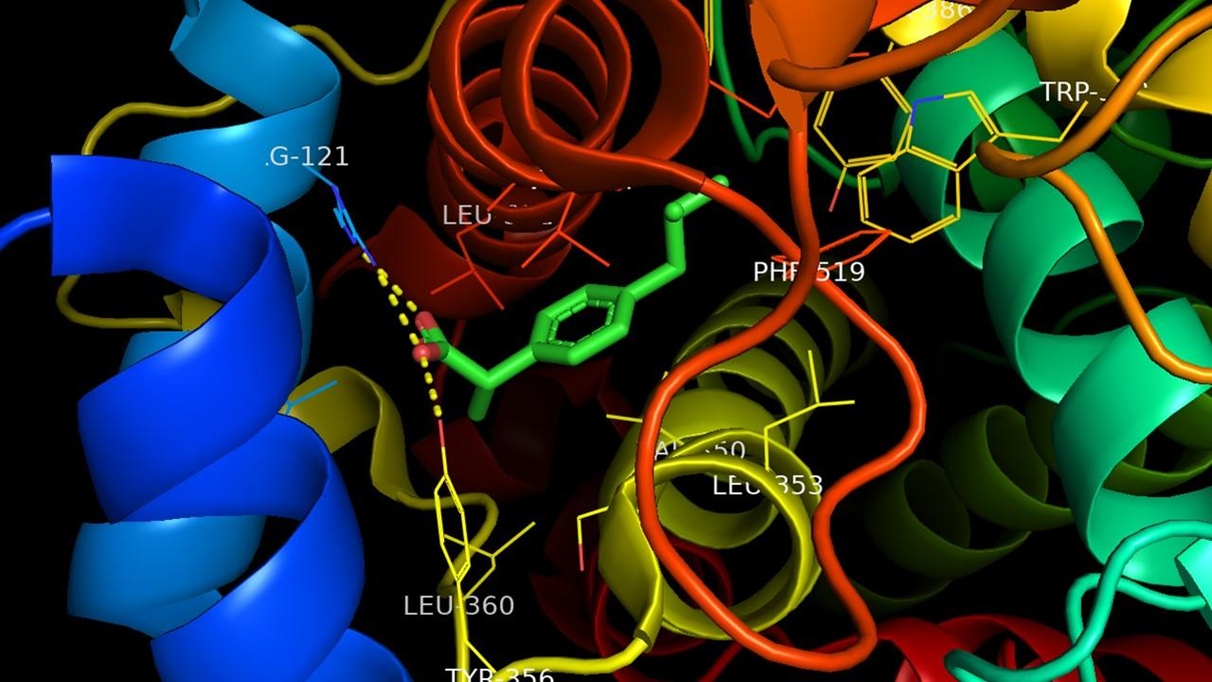

Observe the binding of ibuprofen with cyclooxygenase is optimized in the binding cavity with hydrogen bonding (yellow lines) and hydrophobic interaction with aromatic ring and methyl groups of ibuprofen with hydrophobic interaction of Phe, Leu, Tyr and Trp from protein. These interaction makes the drug molecule ibuprofen to bind to cyclooxygenase protein with high affinity. If these interactions are optimum, docking energy will be lower. This provides and example of how ligand molecule binding is optimized.
*italicized text*

### **Are solvent molecules important in docking?**
In most of the cases, we remove water and other solvent molecules and counter ions from the crystal structure of the proteins.
Optional: Some metal ions and solvent molecules are needed for some docking calculations.


### 🌟 **Activity: Analyze Angiotensin-Converting Enzyme Binding Site for Solvent Molecules**

**Objective:**  
To use PyMOL in **command mode** to explore the binding site of **angiotensin-converting enzyme (ACE)** and identify solvent molecules.

### **Steps to Perform the Activity**

#### **Step 1: Fetch the Protein Structure**
1. **Load the PDB File:**
   Use the command line in PyMOL to fetch the structure of ACE in complex with lisinopril:
     ```
     PyMol> fetch 1o86
     ```

2. **Initial Display:**
   The crystal structure of ACE will load, showing the protein and surrounding water molecules.

#### **Step 2: Observe the Protein and Water Molecules**
1. **Display Cartoon Representation:**
   Apply the **ligand site preset** to simplify the view:
     ```
     PyMol> preset.ligand_site
     ```

2. **Inspect Water Molecules:**
   Water molecules are shown as red **spheres** around the protein, indicating their globular nature.

#### **Step 3: Highlight Solvent Binding Site**
1. **Select Water Molecules:**
   Use the following command to select and isolate water molecules:
     ```
     PyMol> select water, resn HOH
     ```

2. **Zoom into Binding Site:**
   Focus on the region around the ligand (lisinopril):
     ```
     PyMol> zoom water
     ```

3. **Optional - Color Water Molecules:**
   To better visualize the water molecules:
     ```
     PyMol> color cyan, water
     ```

#### **Step 4: Analyze the Protein-Ligand-Solvent Interaction**
1. **Key Observations:**
   Notice how water molecules surround the protein due to its globular nature.
   Water molecules near the ligand-binding site may stabilize the ligand or participate in hydrogen bonding.

The ligand site with hydrogen bonding is shown in Zoom view-image should look like the view below. Ligand is shown as thick sticks and protein as secondary structure and amino acids in the binding site as think sticks and water as small red spheres. You can turn around and view the water molecule at the ligand binding site.


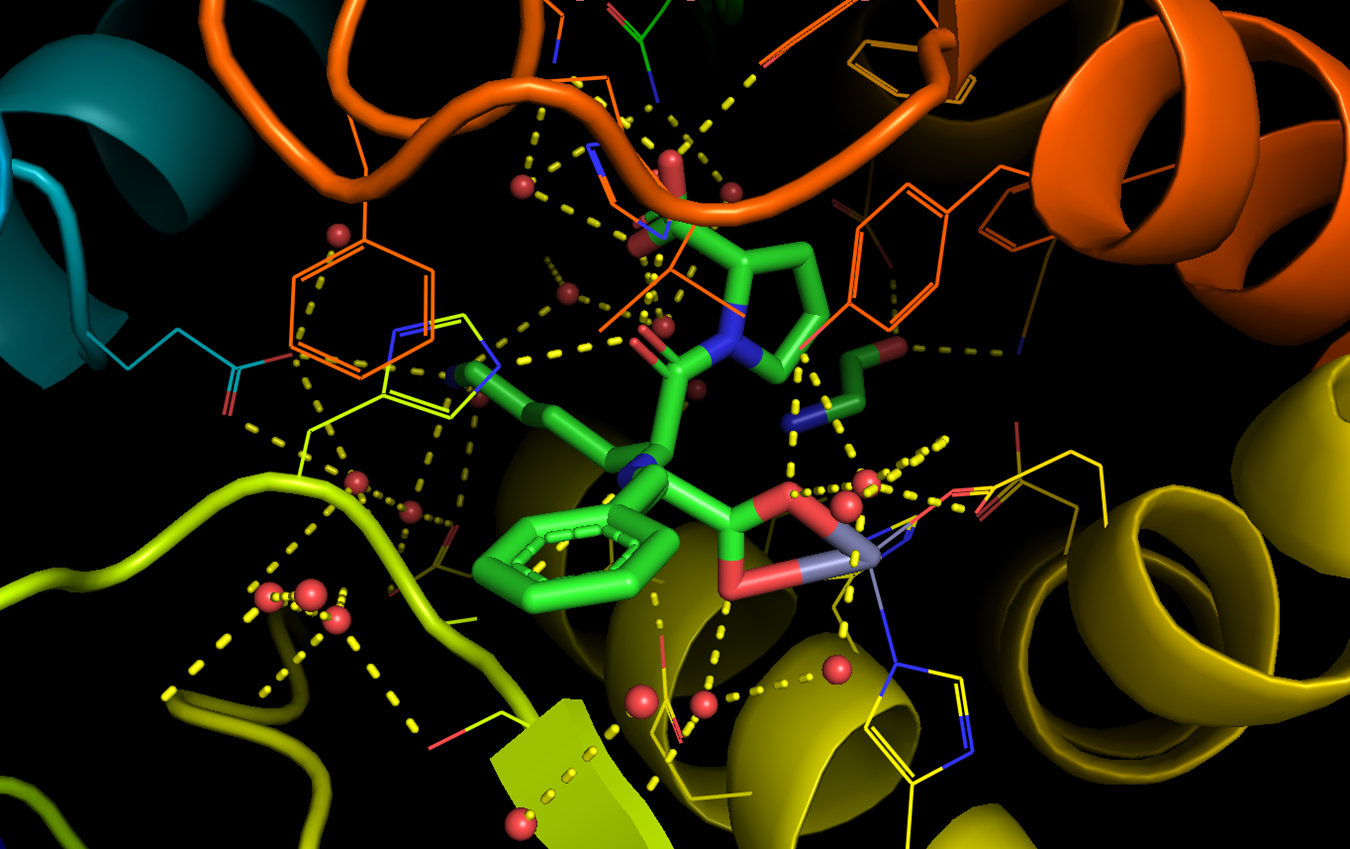

### 🌟 **Activity: Visualizing the Zinc Atom in Angiotensin-Converting Enzyme**

**Objective:**  
To locate and highlight the **zinc atom (Zn)** in the **angiotensin-converting enzyme (ACE)** structure using PyMOL's sequence menu and selection options.

### **Steps to Perform the Activity**

#### **Step 1: Display the Protein Sequence**
1. **Open the Sequence Viewer:**
   Navigate to:
     ```
     Display > Sequence
     ```
   The protein sequence will appear at the top of the PyMOL interface.

2. **Locate the Zinc Atom:**
   Use the **scroll bar** in the sequence menu to slide through the displayed elements and find **Zn**.

#### **Step 2: Select the Zinc Atom**
1. **Click on Zn:**
   Click directly on the **Zn** in the sequence menu to select it.

2. **Highlight the Zinc Atom:**
   On the right-side menu:
     ```
     Select > S > Spheres
     ```
   The zinc atom will now be displayed as a **sphere**, making it easier to visualize.

### **Key Observations**
1. **Role of Zinc in ACE:**
   The zinc atom plays a critical role in the catalytic activity of angiotensin-converting enzyme.
2. **Position of Zinc:**
   Observe its location within the **active site** and its proximity to other key residues and ligands.

You should see the Zinc atom displayed as a sphere. Zinc is bound to the ligand
Visualize the ligand site – you can see that ligand binding is optimized in the cavity of the protein binding site with water molecule and Zinc in addition to the amino acids from the protein interacting with the ligand. Thus, in some docking calculations water and metal ion are important for optimizing the ligand-receptor interactions.
